In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from datetime import datetime

/Users/bebik/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


##  Zeev
## 033363870
## Assaf
## 204249197
### setting and Downloading the tickets

In [2]:
hotels = pd.read_csv('/Users/bebik/Documents/hotels_data.csv')

In [3]:

import datetime

date_time_str = '2018/8/04'
print(hotels['Snapshot Date'][0])
#for index, row in hotels.iterrows():
tabletime = datetime.datetime.strptime( hotels['Snapshot Date'][0] , '%m/%d/%Y %H:%M')
now = datetime.datetime.strptime( date_time_str , '%Y/%m/%d')
newdt = tabletime - now
print (type(newdt))
print ( np.timedelta64(1, 'D').astype(int))


7/17/2015 0:00
<class 'datetime.timedelta'>
1


In [4]:
del hotels['Days'] #always 5
del hotels['Snapshot ID']



In [5]:
hotels.describe()

,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Stars
count,187848.000000,187848.000000,187848.000000,187848.000000,187848.000000
mean,1825.742143,1673.172283,2.434186,14.588561,3.905823
std,1042.355712,983.618013,1.005191,41.575482,0.846496
min,289.000000,260.000000,1.000000,-1.000000,0.000000
25%,1160.000000,1035.000000,2.000000,-1.000000,3.000000
50%,1599.000000,1475.000000,2.000000,-1.000000,4.000000
75%,2160.000000,1963.250000,3.000000,8.000000,4.000000
max,29975.000000,28675.000000,4.000000,431.000000,5.000000


In [6]:
hotels.describe()


,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Stars
count,187848.000000,187848.000000,187848.000000,187848.000000,187848.000000
mean,1825.742143,1673.172283,2.434186,14.588561,3.905823
std,1042.355712,983.618013,1.005191,41.575482,0.846496
min,289.000000,260.000000,1.000000,-1.000000,0.000000
25%,1160.000000,1035.000000,2.000000,-1.000000,3.000000
50%,1599.000000,1475.000000,2.000000,-1.000000,4.000000
75%,2160.000000,1963.250000,3.000000,8.000000,4.000000
max,29975.000000,28675.000000,4.000000,431.000000,5.000000


In [7]:
hotels['SnapDate']= pd.to_datetime(hotels['Snapshot Date']) 
hotels['CheckingDate']= pd.to_datetime(hotels['Checkin Date']) 
hotels['weekday']= hotels['CheckingDate'].dt.dayofweek

In [8]:
hotels['DayDiff'] = hotels['CheckingDate']-hotels['SnapDate']
hotels['Discount'] = hotels['Original Price']-hotels['Discount Price']
hotels['DiscountPerc'] = hotels['Discount']/hotels['Original Price']*100
#hotels['delta_days']= (hotels['CheckingDate']- now).astype(int)/8.636207/10**13
hotels['delta_days']=(pd.to_datetime(hotels['Checkin Date']) - pd.to_datetime(hotels['Snapshot Date'])).dt.days


In [9]:
hotels.describe()

,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Stars,weekday,DayDiff,Discount,DiscountPerc,delta_days
count,187848.000000,187848.000000,187848.000000,187848.000000,187848.000000,187848.000000,187848,187848.000000,187848.000000,187848.000000
mean,1825.742143,1673.172283,2.434186,14.588561,3.905823,2.917763,17 days 11:10:35.185894,152.569860,8.877715,17.465685
std,1042.355712,983.618013,1.005191,41.575482,0.846496,1.840536,10 days 00:57:55.438813,143.316985,6.030248,10.040225
min,289.000000,260.000000,1.000000,-1.000000,0.000000,0.000000,1 days 00:00:00,15.000000,0.581395,1.000000
25%,1160.000000,1035.000000,2.000000,-1.000000,3.000000,2.000000,9 days 00:00:00,70.000000,4.844961,9.000000
50%,1599.000000,1475.000000,2.000000,-1.000000,4.000000,3.000000,18 days 00:00:00,103.000000,7.056229,18.000000
75%,2160.000000,1963.250000,3.000000,8.000000,4.000000,4.000000,26 days 00:00:00,180.000000,10.933941,26.000000
max,29975.000000,28675.000000,4.000000,431.000000,5.000000,6.000000,34 days 00:00:00,3760.000000,68.425842,34.000000


## Createing Dendogram
1. calculating the 40 hotels with most checking information
2. add the dates of the 40 hotels to the selected dates
3. create df_df with the 40 X 40 (dates*codes) * hotel ids
4. hotel ids and names are in the hotels DataFrame

In [10]:
import numpy 
vals = numpy.unique(hotels['Hotel Name'].values)
checkins = numpy.unique(hotels['Checkin Date'].values)
hotels_num = numpy.unique(hotels['Hotel Name'].values)
print (type(hotels_num[0]))
#print(checkins,len(checkins))             
#print(hotels_num,len(hotels_num))             
numbers = []
for i in range(len(vals)) :
    numbers.append(i)
print (len(vals),len(numbers) )
hotels['hotel']=hotels['Hotel Name']
hotels['hotel'].replace(to_replace=vals, value=numbers,inplace = True)
hotels.head()

lens = []
for date in checkins:
    xdf = hotels['Checkin Date']==date
    lens.append (len(hotels[xdf]))
lens.sort()


<class 'str'>
554 554


In [11]:
print (lens[len(lens) - 41])
bar = lens[len(lens) - 41]
cnt =0
lista =[]
selected_dates = [] 
df_top40 = pd.DataFrame()
for date in checkins:
    xdf = hotels['Checkin Date']==date
    if (len(hotels[xdf]) > bar):
        selected_dates.append(date)
        cnt+=len(hotels[xdf])
        df_top40 = df_top40.append(hotels[xdf])

print(cnt)
df_top40.describe()

1307
65626


,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Stars,weekday,DayDiff,Discount,DiscountPerc,delta_days,hotel
count,65626.000000,65626.000000,65626.000000,65626.000000,65626.000000,65626.000000,65626,65626.000000,65626.000000,65626.000000,65626.000000
mean,1860.317816,1702.353077,2.438881,15.247783,3.904550,2.861229,17 days 13:30:13.659220,157.964740,8.877975,17.562658,288.245192
std,991.594738,931.516379,0.996660,41.035860,0.826034,1.099896,10 days 00:09:07.970866,145.354637,5.736948,10.006342,147.396464
min,300.000000,281.000000,1.000000,-1.000000,0.000000,1.000000,1 days 00:00:00,16.000000,1.026518,1.000000,0.000000
25%,1242.000000,1117.000000,2.000000,-1.000000,3.000000,2.000000,9 days 00:00:00,74.000000,4.946043,9.000000,175.000000
50%,1670.000000,1527.000000,2.000000,-1.000000,4.000000,3.000000,18 days 00:00:00,112.000000,7.245223,18.000000,286.000000
75%,2156.000000,1966.000000,3.000000,8.000000,4.000000,4.000000,26 days 00:00:00,190.000000,11.111111,26.000000,396.000000
max,10625.000000,10500.000000,4.000000,383.000000,5.000000,5.000000,34 days 00:00:00,2900.000000,68.305669,34.000000,553.000000


In [12]:
print(selected_dates)

['10/1/2015 0:00', '10/14/2015 0:00', '10/15/2015 0:00', '10/16/2015 0:00', '10/2/2015 0:00', '10/21/2015 0:00', '10/22/2015 0:00', '10/27/2015 0:00', '10/28/2015 0:00', '10/29/2015 0:00', '10/30/2015 0:00', '10/31/2015 0:00', '10/7/2015 0:00', '11/10/2015 0:00', '11/11/2015 0:00', '11/12/2015 0:00', '11/13/2015 0:00', '11/18/2015 0:00', '11/21/2015 0:00', '11/26/2015 0:00', '11/27/2015 0:00', '11/28/2015 0:00', '11/3/2015 0:00', '11/4/2015 0:00', '11/5/2015 0:00', '11/6/2015 0:00', '11/7/2015 0:00', '12/30/2015 0:00', '8/12/2015 0:00', '8/19/2015 0:00', '8/26/2015 0:00', '8/27/2015 0:00', '8/28/2015 0:00', '9/10/2015 0:00', '9/11/2015 0:00', '9/16/2015 0:00', '9/17/2015 0:00', '9/18/2015 0:00', '9/30/2015 0:00', '9/9/2015 0:00']


In [13]:
our_columns =[]
for date in selected_dates:
    our_columns.append(date+'_1')
    our_columns.append(date+'_2')
    our_columns.append(date+'_3')
    our_columns.append(date+'_4')
dandogram_df = pd.DataFrame(columns=our_columns)
print (len(our_columns))

#print ((our_columns))



160


In [14]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
#X, y = make_classification(random_state=0)
X = hotels.copy()
y = X['Discount Code']
del X['Hotel Stars']
del X['Discount Code']

#del X['DiscountPerc']



X['days_delta'] = X['DayDiff'].astype('timedelta64[D]')
del X['DayDiff']
del X['Snapshot Date']
del X['Checkin Date']
del X['Hotel Name']
del X['SnapDate']
del X['CheckingDate']
#del X['Discount Price']
del X['Discount']

print(X.describe())





       Original Price  Discount Price  Available Rooms        weekday  \
count   187848.000000   187848.000000    187848.000000  187848.000000   
mean      1825.742143     1673.172283        14.588561       2.917763   
std       1042.355712      983.618013        41.575482       1.840536   
min        289.000000      260.000000        -1.000000       0.000000   
25%       1160.000000     1035.000000        -1.000000       2.000000   
50%       1599.000000     1475.000000        -1.000000       3.000000   
75%       2160.000000     1963.250000         8.000000       4.000000   
max      29975.000000    28675.000000       431.000000       6.000000   

        DiscountPerc     delta_days          hotel     days_delta  
count  187848.000000  187848.000000  187848.000000  187848.000000  
mean        8.877715      17.465685     289.105655      17.465685  
std         6.030248      10.040225     146.185570      10.040225  
min         0.581395       1.000000       0.000000       1.000000  
25

In [15]:
from sklearn import tree
#X, y = load_iris(return_X_y=True)
#clf2 = tree.DecisionTreeClassifier()
#clf2 = clf2.fit(X_train, y_train)
#clf2 = clf2.predict(X_test)
#tree.plot_tree(clf2) 
#print(clf2)

In [16]:
#tree.plot_tree(clf2) 

In [17]:
#X_test=X_test.append([2000,2,3,4,5])
#print (len(X_test))
#print (clf.predict(X_test[:1]))
#print (X_test[:1])

#array([1, 0])
#clf.score(X_test, y_test)



In [18]:
import numpy as np
import torch
import sys
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils import data
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

import os
pic_size = 256
os.environ['KMP_DUPLICATE_LIB_OK']='True'


class Simple_MLP(nn.Module):
    def __init__(self,size_list):
        super(Simple_MLP,self).__init__()
        layers=[]
        self.size_list = size_list
        for i in range(len(size_list) -2):
            layers.append(nn.Linear(size_list[i],size_list[i+1]))
            op = random.randint(0,2) 
            
            layers.append(torch.nn.ReLU())
        #layers.append(nn.Linear(size_list[-3],size_list[-2]))
        #layers.append(nn.Softmax(dim=1))
        layers.append(nn.Linear(size_list[-2],size_list[-1]))
        self.net = nn.Sequential(*layers)
        
    def forward(self,x):
        return self.net(x)

In [19]:
class HotelsDataset(data.Dataset):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    
    def __len__(self):
        return len(self.Y)
    
    def __getitem__(self,index):
        X = self.X[index].float()
        Y = self.Y[index].float()
        return X,Y

In [20]:
import pandas as pd
import numpy as np
import torch

def df_to_tensor(df):
    #device = get_device()
    #return torch.from_numpy(df.values)
    return torch.FloatTensor(df.values)
def create_set(num,df,target_col):
    print(' target column is ',target_col)
    df_train_sample = df.copy()
    if (num != 0):
        df_train_sample = df_train_sample.sample( n = num)
    target_sample = pd.DataFrame(df_train_sample[target_col] )
    ten_train_target = torch.FloatTensor(target_sample[target_col].values)
    #print("train_target ",ten_train_target)
    del df_train_sample[target_col]
    #df_to_tensor(target)
    ten_train_data = df_to_tensor(df_train_sample)

    #print ("target is " , ten_train_target)
    #print(ten_train_target)
    train_dataset = HotelsDataset(ten_train_data,ten_train_target)


    train_loader_args = dict(shuffle=True,batch_size=pic_size)
    train_loader = data.DataLoader(train_dataset,**train_loader_args)
    return train_loader

def create_set2(num,df,target_col):
    df_train_sample = df.copy()
    if (num != 0):
        df_train_sample = df_train_sample.sample( n = num)
    target_sample = pd.DataFrame(df_train_sample[target_col] )
    ten_train_target = torch.FloatTensor(target_sample[target_col].values)
    
    del df_train_sample[target_col]
    #df_to_tensor(target)
    ten_train_data = df_to_tensor(df_train_sample)

    return ten_train_data




In [21]:

import random

#criterion = nn.L1Loss()
first_round = 7
#first_round = 5


end_round  = 1
device = torch.device( "cpu")
def create_ar(lens):
    
    r1 = 160
    r2 = 160
    ar = [first_round]
    for i in range(random.randint(1,lens)):
        r1 = random.randint(4,140)
        ar.append( r1  )
        r2 = random.randint(4,140)
        ar.append(  r2 )
    ar.append(end_round)
    return ar


#create next generations
def next_gen(best_ar):
    
    ar_left = []
    ar_right = []
    for index,item in enumerate(best_ar):
        r1 = random.randint(4,140)
        if (index is 0 or index is len(best_ar)-1):
            r1=item
        if (index < len(best_ar)/2 ):
            ar_left.append(item)
            ar_right.append(r1)
        else:
            ar_left.append(r1)
            ar_right.append(item)
    
    return ar_left,ar_right,best_ar



def create_model(ar): 
    print("create_model = ",ar)
    model = Simple_MLP(ar)
    optimizer = optim.Adam(model.parameters())
    print(model)
    return model,optimizer ,ar
ar2=create_ar(10)
model,optimizer ,ar2= create_model(ar2)
next_gen(ar2)

create_model =  [7, 74, 103, 91, 91, 97, 80, 62, 4, 1]
Simple_MLP(
  (net): Sequential(
    (0): Linear(in_features=7, out_features=74, bias=True)
    (1): ReLU()
    (2): Linear(in_features=74, out_features=103, bias=True)
    (3): ReLU()
    (4): Linear(in_features=103, out_features=91, bias=True)
    (5): ReLU()
    (6): Linear(in_features=91, out_features=91, bias=True)
    (7): ReLU()
    (8): Linear(in_features=91, out_features=97, bias=True)
    (9): ReLU()
    (10): Linear(in_features=97, out_features=80, bias=True)
    (11): ReLU()
    (12): Linear(in_features=80, out_features=62, bias=True)
    (13): ReLU()
    (14): Linear(in_features=62, out_features=4, bias=True)
    (15): ReLU()
    (16): Linear(in_features=4, out_features=1, bias=True)
  )
)


([7, 74, 103, 91, 91, 112, 35, 134, 69, 1],
 [7, 11, 116, 72, 8, 97, 80, 62, 4, 1],
 [7, 74, 103, 91, 91, 97, 80, 62, 4, 1])

In [22]:
import numpy as np
import torch
import sys
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils import data
from torchvision import transforms

import matplotlib.pyplot as plt

import os
def create_data_loader(df,target_col):
    target = pd.DataFrame(df[ target_col] )
    #print(target)
    ten_target = torch.FloatTensor(target[target_col].values)
    df = df.drop(target_col ,axis=1 )
    ten_data = df_to_tensor(df)
    #print (ten_data)

    _dataset = HotelsDataset(ten_data,ten_target)



#    test_loader_args = dict(shuffle=True,batch_size=pic_size,num_workers=0,pin_memory=True) if cuda\
#    else 
    test_loader_args = dict(shuffle=True,batch_size=pic_size)
    loader = data.DataLoader(_dataset,**test_loader_args)
    return ten_target,loader



In [23]:
df_train = hotels.copy()
del df_train['DayDiff']
del df_train['Snapshot Date']
#hotels_df['SnapshotUnixDate']  = pd.to_datetime(hotels_df['Snapshot Date'])

del df_train['Checkin Date']
del df_train['Hotel Name']
del df_train['SnapDate']
del df_train['CheckingDate']


target_columns = 'DiscountPerc'
#target_columns = 'Discount Price'
from sklearn.model_selection import train_test_split

df_train, df_validate = train_test_split(df_train, test_size=0.2)
df_train2 = df_train.copy()
#print(df_validate.describe())
ten_target,loader = create_data_loader(df_train2,target_columns)
#df_validate =  df_train.sample(n = 10000)


df_validate = df_validate.drop("Discount Price" ,axis=1 )
#df_validate = df_validate.drop("DiscountPerc" ,axis=1 )
df_validate = df_validate.drop("Discount" ,axis=1 )
validate_target, validate_loader = create_data_loader(df_validate,target_columns)
#df_train.describe()

## Evolutionary algorithm with Deep networks

1. Starting with random network with Relu activation functions.
2. each generation take the 
    a. original
    b. left original + random   right
    c. left random   + original right
    d. random (with random size)

In [24]:
import time
def train_epoch(model,train_loader,criterion,optimizer):
    #print(1)
    model.train()
    model.to(device)
    running_loss=0.0
    
    start_time = time.time()
    for batch_idx, (data,target) in enumerate(train_loader):
        #print (target)
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        outputs = model(data)
        
        target = target.unsqueeze(1)
        target = target.float() 
        
        
        loss = criterion(outputs,target)
        running_loss += loss.item()
        #print("Train Loss item: ", loss.item() )
        #print (outputs)
        loss.backward()
        optimizer.step()
    
    end_time = time.time()   
    running_loss /= len(train_loader)
    print("Train Loss: ", running_loss, ' Time: ', end_time-start_time)
    return running_loss




In [25]:
def test_epoch(model,test_loader,criterion):
    with torch.no_grad():
        #print(1)
        model.eval()
        model.to(device)
        
        running_loss = 0.0
        total_predictions = 0.0
        correct_predictions = 0.0
        #print(2)
        total_acc =0
        index =0
        acc =0
        acc1 =0
        for batch_idx, (data,target) in enumerate(test_loader):
            #print(3)
            data = data.to(device)
            target = target.to(device)
            outputs = model(data)
            
            #print ("outputs 1= ", outputs[1] ) 
            #print ("outputs  ", outputs ) 
            #print ("target x = ", target)
            # Predicted discount / Discount
            acc1 = (outputs.data/target.data)
            #print ("acc is x= ",acc)
            loss = criterion(outputs,target).detach()
            running_loss += loss.item()
            total_acc +=torch.mean(acc1[0]) 
            index = index + 1
        acc = total_acc/index
        running_loss /= len(test_loader)
        
        print ("mean acc = ",acc," idx ",index )
            
        return running_loss,acc

# run the algorithm 

In [26]:
#df_train_bkup = df_train.copy()

#df_train = df_train.drop("Available Rooms" ,axis=1 )
#df_train = df_train.drop("Discount Code" ,axis=1 )
#df_train = df_train.drop("Hotel Stars" ,axis=1 )
#df_train = df_train.drop("weekday" ,axis=1 )
#df_train = df_train.drop("Discount" ,axis=1 )
#df_train = df_train.drop("delta_days" ,axis=1 )


df_train = df_train.drop("Discount Price" ,axis=1 )

#df_train = df_train.drop("DiscountPerc" ,axis=1 )



df_train = df_train.drop("Discount" ,axis=1 )


df_train.head(100)



,Original Price,Discount Code,Available Rooms,Hotel Stars,weekday,DiscountPerc,delta_days,hotel
98347,5075,1,27,5,2,3.940887,1,482
161213,1311,4,-1,4,2,5.491991,33,94
4464,750,4,-1,4,3,10.666667,15,199
135669,1366,4,1,4,5,4.831625,34,301
23472,3763,3,48,5,6,8.184959,24,341
...,...,...,...,...,...,...,...,...
26771,2846,2,1,4,5,3.162333,17,242
87609,1905,2,2,4,2,34.908136,22,287
114113,1935,3,70,4,1,3.410853,10,538
81046,1775,3,-1,4,2,3.380282,27,323


In [27]:
df_train.describe()

,Original Price,Discount Code,Available Rooms,Hotel Stars,weekday,DiscountPerc,delta_days,hotel
count,150278.000000,150278.000000,150278.000000,150278.000000,150278.000000,150278.000000,150278.000000,150278.000000
mean,1825.561772,2.432352,14.579380,3.905375,2.919216,8.881183,17.484216,289.074522
std,1042.681116,1.005444,41.581135,0.846907,1.839048,6.028766,10.045060,146.139747
min,289.000000,1.000000,-1.000000,0.000000,0.000000,0.581395,1.000000,0.000000
25%,1160.000000,2.000000,-1.000000,3.000000,2.000000,4.852050,9.000000,176.000000
50%,1600.000000,2.000000,-1.000000,4.000000,3.000000,7.058824,18.000000,285.000000
75%,2164.000000,3.000000,8.000000,4.000000,4.000000,10.933941,26.000000,397.000000
max,29975.000000,4.000000,431.000000,5.000000,6.000000,68.425842,34.000000,553.000000


In [28]:

n_epoch = 5
Train_loss = []
Test_loss = []
Test_acc = []

#model2,optimizer2 = create_model()
acc1 =0
acc2 =0

arx = create_ar(8)
best , ar1,ar2 = next_gen(arx)
#This is the 4 models that we are working on 
loops = [best,ar1,ar2,arx]

target_columns='DiscountPerc'
#target_columns = 'perc'
results =[]
best_score =100000000
best_index =-1
a,b,best =[],[],[]
for generations in range (10):
    #plt.plot(Test_acc)
    #Loop over the models and choose the best one.
    for index in range(4):
        criterion = nn.MSELoss()
        #criterion = nn.CrossEntropyLoss()
        model ,optimizer ,ar = create_model(loops[index])
        temp_model = model
        temp_optimizer = optimizer
       
        for i in range(n_epoch):
            #print (df_train.head())
            train_loader = create_set(1000,df_train,target_columns)
            #print(df_train.head())
            train_loss = train_epoch(temp_model,train_loader,criterion,temp_optimizer)
            test_loss ,acc= test_epoch(temp_model,validate_loader,criterion)
            
            #Train_loss.append(train_loss)
            Test_loss.append(test_loss)
            print("train loss",train_loss)
            print("test loss" , test_loss)
            #Test_acc.append(test_acc)
            print('='*50,'gen=',generations,'index',i,'vector=',index)
        
        if (test_loss < best_score):
            print ("updating model ======= ", test_loss)
            best_model = temp_model
            best_optimizer = temp_optimizer
            best_score = test_loss
            best_index = index
        
        results.append(test_loss)
    
    
    a,b,best = next_gen(loops[index])
    c=create_ar(8)
    results =[]
    
    



    

create_model =  [7, 38, 44, 46, 28, 120, 112, 9, 89, 44, 12, 1]
Simple_MLP(
  (net): Sequential(
    (0): Linear(in_features=7, out_features=38, bias=True)
    (1): ReLU()
    (2): Linear(in_features=38, out_features=44, bias=True)
    (3): ReLU()
    (4): Linear(in_features=44, out_features=46, bias=True)
    (5): ReLU()
    (6): Linear(in_features=46, out_features=28, bias=True)
    (7): ReLU()
    (8): Linear(in_features=28, out_features=120, bias=True)
    (9): ReLU()
    (10): Linear(in_features=120, out_features=112, bias=True)
    (11): ReLU()
    (12): Linear(in_features=112, out_features=9, bias=True)
    (13): ReLU()
    (14): Linear(in_features=9, out_features=89, bias=True)
    (15): ReLU()
    (16): Linear(in_features=89, out_features=44, bias=True)
    (17): ReLU()
    (18): Linear(in_features=44, out_features=12, bias=True)
    (19): ReLU()
    (20): Linear(in_features=12, out_features=1, bias=True)
  )
)
 target column is  DiscountPerc
Train Loss:  109.33008575439453  T

/Users/bebik/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/bebik/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([194])) that is different to the input size (torch.Size([194, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


mean acc =  tensor(0.1750)  idx  147
train loss 109.33008575439453
test loss 98.21526606553266
================================================== gen= 0 index 0 vector= 0
 target column is  DiscountPerc
Train Loss:  91.80571556091309  Time:  0.022922039031982422
mean acc =  tensor(0.7771)  idx  147
train loss 91.80571556091309
test loss 59.29568587841631
================================================== gen= 0 index 1 vector= 0
 target column is  DiscountPerc
Train Loss:  65.51269817352295  Time:  0.029703855514526367
mean acc =  tensor(1.4890)  idx  147
train loss 65.51269817352295
test loss 59.99422060389097
================================================== gen= 0 index 2 vector= 0
 target column is  DiscountPerc
Train Loss:  62.22807598114014  Time:  0.02245807647705078
mean acc =  tensor(0.9742)  idx  147
train loss 62.22807598114014
test loss 54.59658058322206
================================================== gen= 0 index 3 vector= 0
 target column is  DiscountPerc
Train Loss: 

mean acc =  tensor(0.1411)  idx  147
train loss 105.26658248901367
test loss 100.83234255005713
================================================== gen= 1 index 0 vector= 0
 target column is  DiscountPerc
Train Loss:  92.31113052368164  Time:  0.026335954666137695
mean acc =  tensor(0.5669)  idx  147
train loss 92.31113052368164
test loss 68.14374783574318
================================================== gen= 1 index 1 vector= 0
 target column is  DiscountPerc
Train Loss:  66.5594253540039  Time:  0.02665996551513672
mean acc =  tensor(1.4999)  idx  147
train loss 66.5594253540039
test loss 63.93287671666567
================================================== gen= 1 index 2 vector= 0
 target column is  DiscountPerc
Train Loss:  62.24763202667236  Time:  0.02583909034729004
mean acc =  tensor(1.1015)  idx  147
train loss 62.24763202667236
test loss 53.55847323670679
================================================== gen= 1 index 3 vector= 0
 target column is  DiscountPerc
Train Loss:  6

mean acc =  tensor(0.0118)  idx  147
train loss 116.44186592102051
test loss 113.67373911539714
================================================== gen= 2 index 0 vector= 0
 target column is  DiscountPerc
Train Loss:  112.66223335266113  Time:  0.024526119232177734
mean acc =  tensor(0.1040)  idx  147
train loss 112.66223335266113
test loss 104.04068626351908
================================================== gen= 2 index 1 vector= 0
 target column is  DiscountPerc
Train Loss:  98.89590072631836  Time:  0.023683786392211914
mean acc =  tensor(0.5277)  idx  147
train loss 98.89590072631836
test loss 71.90595250551392
================================================== gen= 2 index 2 vector= 0
 target column is  DiscountPerc
Train Loss:  65.44370937347412  Time:  0.023083209991455078
mean acc =  tensor(1.5516)  idx  147
train loss 65.44370937347412
test loss 60.68772600135025
================================================== gen= 2 index 3 vector= 0
 target column is  DiscountPerc
Train L

mean acc =  tensor(0.1647)  idx  147
train loss 95.79636573791504
test loss 97.31842414700255
================================================== gen= 3 index 0 vector= 0
 target column is  DiscountPerc
Train Loss:  93.21641159057617  Time:  0.027369976043701172
mean acc =  tensor(0.6081)  idx  147
train loss 93.21641159057617
test loss 66.71566733535455
================================================== gen= 3 index 1 vector= 0
 target column is  DiscountPerc
Train Loss:  62.62307643890381  Time:  0.023109912872314453
mean acc =  tensor(1.7374)  idx  147
train loss 62.62307643890381
test loss 68.57034750698375
================================================== gen= 3 index 2 vector= 0
 target column is  DiscountPerc
Train Loss:  71.91459083557129  Time:  0.026855945587158203
mean acc =  tensor(1.0098)  idx  147
train loss 71.91459083557129
test loss 55.653321532165116
================================================== gen= 3 index 3 vector= 0
 target column is  DiscountPerc
Train Loss:

mean acc =  tensor(0.0308)  idx  147
train loss 116.2530746459961
test loss 112.05469632310933
================================================== gen= 4 index 0 vector= 0
 target column is  DiscountPerc
Train Loss:  119.85103607177734  Time:  0.024860858917236328
mean acc =  tensor(0.1948)  idx  147
train loss 119.85103607177734
test loss 95.61435196026653
================================================== gen= 4 index 1 vector= 0
 target column is  DiscountPerc
Train Loss:  90.72250366210938  Time:  0.024744033813476562
mean acc =  tensor(0.7395)  idx  147
train loss 90.72250366210938
test loss 62.895567705842105
================================================== gen= 4 index 2 vector= 0
 target column is  DiscountPerc
Train Loss:  60.00808048248291  Time:  0.024152040481567383
mean acc =  tensor(1.2593)  idx  147
train loss 60.00808048248291
test loss 59.88717708457895
================================================== gen= 4 index 3 vector= 0
 target column is  DiscountPerc
Train Lo

mean acc =  tensor(0.0333)  idx  147
train loss 111.35087966918945
test loss 111.35793164311623
================================================== gen= 5 index 0 vector= 0
 target column is  DiscountPerc
Train Loss:  112.28393173217773  Time:  0.02246713638305664
mean acc =  tensor(0.1735)  idx  147
train loss 112.28393173217773
test loss 97.09823302184644
================================================== gen= 5 index 1 vector= 0
 target column is  DiscountPerc
Train Loss:  92.83520698547363  Time:  0.023262977600097656
mean acc =  tensor(0.6142)  idx  147
train loss 92.83520698547363
test loss 64.59080705188569
================================================== gen= 5 index 2 vector= 0
 target column is  DiscountPerc
Train Loss:  66.1294174194336  Time:  0.02483677864074707
mean acc =  tensor(1.6699)  idx  147
train loss 66.1294174194336
test loss 63.04027035771584
================================================== gen= 5 index 3 vector= 0
 target column is  DiscountPerc
Train Loss: 

mean acc =  tensor(0.0328)  idx  147
train loss 116.01359748840332
test loss 111.41425780211988
================================================== gen= 6 index 0 vector= 0
 target column is  DiscountPerc
Train Loss:  101.6138801574707  Time:  0.022756099700927734
mean acc =  tensor(0.0964)  idx  147
train loss 101.6138801574707
test loss 105.08603159586589
================================================== gen= 6 index 1 vector= 0
 target column is  DiscountPerc
Train Loss:  101.35391998291016  Time:  0.022705078125
mean acc =  tensor(0.3204)  idx  147
train loss 101.35391998291016
test loss 85.01440447852725
================================================== gen= 6 index 2 vector= 0
 target column is  DiscountPerc
Train Loss:  72.5598497390747  Time:  0.023579835891723633
mean acc =  tensor(1.1349)  idx  147
train loss 72.5598497390747
test loss 55.366814879333084
================================================== gen= 6 index 3 vector= 0
 target column is  DiscountPerc
Train Loss:  6

mean acc =  tensor(0.0957)  idx  147
train loss 116.72129440307617
test loss 104.64453021198715
================================================== gen= 7 index 0 vector= 0
 target column is  DiscountPerc
Train Loss:  90.94810485839844  Time:  0.021737098693847656
mean acc =  tensor(0.2966)  idx  147
train loss 90.94810485839844
test loss 85.67702203867387
================================================== gen= 7 index 1 vector= 0
 target column is  DiscountPerc
Train Loss:  76.28665733337402  Time:  0.023119211196899414
mean acc =  tensor(0.9296)  idx  147
train loss 76.28665733337402
test loss 55.15595769557823
================================================== gen= 7 index 2 vector= 0
 target column is  DiscountPerc
Train Loss:  72.06854820251465  Time:  0.023432254791259766
mean acc =  tensor(1.4837)  idx  147
train loss 72.06854820251465
test loss 62.69136101858957
================================================== gen= 7 index 3 vector= 0
 target column is  DiscountPerc
Train Loss

mean acc =  tensor(0.0436)  idx  147
train loss 113.33986854553223
test loss 110.20830115493463
================================================== gen= 8 index 0 vector= 0
 target column is  DiscountPerc
Train Loss:  105.80594825744629  Time:  0.022619962692260742
mean acc =  tensor(0.2773)  idx  147
train loss 105.80594825744629
test loss 88.09672530816526
================================================== gen= 8 index 1 vector= 0
 target column is  DiscountPerc
Train Loss:  79.78704071044922  Time:  0.02265477180480957
mean acc =  tensor(1.0764)  idx  147
train loss 79.78704071044922
test loss 57.109925743673934
================================================== gen= 8 index 2 vector= 0
 target column is  DiscountPerc
Train Loss:  71.54425048828125  Time:  0.022436141967773438
mean acc =  tensor(1.2507)  idx  147
train loss 71.54425048828125
test loss 57.09999722850566
================================================== gen= 8 index 3 vector= 0
 target column is  DiscountPerc
Train Lo

mean acc =  tensor(0.1095)  idx  147
train loss 109.09031295776367
test loss 103.44905152612803
================================================== gen= 9 index 0 vector= 0
 target column is  DiscountPerc
Train Loss:  93.87698936462402  Time:  0.02445697784423828
mean acc =  tensor(0.5059)  idx  147
train loss 93.87698936462402
test loss 74.00206587914707
================================================== gen= 9 index 1 vector= 0
 target column is  DiscountPerc
Train Loss:  75.81063079833984  Time:  0.022105932235717773
mean acc =  tensor(1.4493)  idx  147
train loss 75.81063079833984
test loss 59.54752098135397
================================================== gen= 9 index 2 vector= 0
 target column is  DiscountPerc
Train Loss:  69.96648979187012  Time:  0.02266693115234375
mean acc =  tensor(1.3661)  idx  147
train loss 69.96648979187012
test loss 56.515529684469
================================================== gen= 9 index 3 vector= 0
 target column is  DiscountPerc
Train Loss:  6

In [29]:
for i in range(33):
            train_loader = create_set(50000,df_train,target_columns)
            train_loss = train_epoch(best_model,train_loader,criterion,best_optimizer)
            test_loss ,acc= test_epoch(best_model,validate_loader,criterion)

            Test_acc.append(acc)
            Train_loss.append(train_loss)
            Test_loss.append(test_loss)
      
            #print('='*50,i)

print (Test_acc)

 target column is  DiscountPerc
Train Loss:  47.72405126143475  Time:  1.314159870147705
mean acc =  tensor(1.0153)  idx  147
 target column is  DiscountPerc
Train Loss:  38.01370271371336  Time:  1.2075538635253906
mean acc =  tensor(1.3824)  idx  147
 target column is  DiscountPerc
Train Loss:  34.886505584327544  Time:  1.2237937450408936
mean acc =  tensor(1.5142)  idx  147
 target column is  DiscountPerc
Train Loss:  34.24807393794157  Time:  1.3080320358276367
mean acc =  tensor(1.4587)  idx  147
 target column is  DiscountPerc
Train Loss:  33.32326328511141  Time:  1.3051528930664062
mean acc =  tensor(1.4646)  idx  147
 target column is  DiscountPerc
Train Loss:  33.548216002328054  Time:  1.307692050933838
mean acc =  tensor(1.5108)  idx  147
 target column is  DiscountPerc
Train Loss:  33.569760089017905  Time:  1.3510689735412598
mean acc =  tensor(1.4646)  idx  147
 target column is  DiscountPerc
Train Loss:  32.55534246989659  Time:  1.3334758281707764
mean acc =  tensor(1

In [30]:
print (Test_acc)

[tensor(1.0153), tensor(1.3824), tensor(1.5142), tensor(1.4587), tensor(1.4646), tensor(1.5108), tensor(1.4646), tensor(1.5060), tensor(1.4061), tensor(1.4413), tensor(1.4328), tensor(1.4545), tensor(1.5513), tensor(1.4960), tensor(1.4710), tensor(1.5093), tensor(1.4644), tensor(1.3871), tensor(1.3992), tensor(1.5789), tensor(1.5089), tensor(1.4566), tensor(1.4397), tensor(1.4325), tensor(1.3519), tensor(1.5477), tensor(1.3570), tensor(1.5020), tensor(1.4840), tensor(1.4714), tensor(1.4207), tensor(1.3557), tensor(1.4384)]


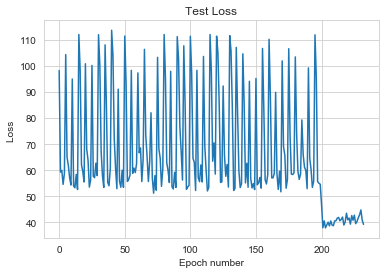

In [31]:
plt.title('Test Loss')
plt.xlabel('Epoch number')
plt.ylabel('Loss ')
plt.plot(Test_loss)


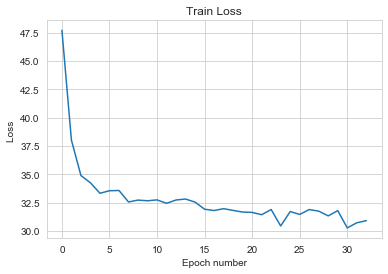

In [32]:
plt.title('Train Loss')
plt.xlabel('Epoch number')
plt.ylabel('Loss ')
plt.plot(Train_loss)

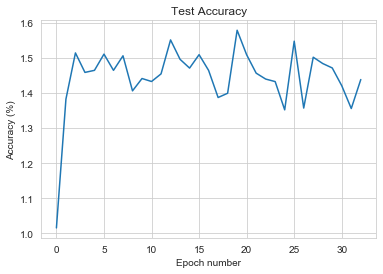

In [33]:
plt.title('Test Accuracy')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy (%)')
plt.plot(Test_acc)

In [34]:
def submit_epoch(model,data):
    with torch.no_grad():
        #print(1)
        results = []
        model.eval()
        model.to(device)
        
        for batch_idx, data in enumerate(data):
          
            data = data.to(device)
            outputs = model(data)
            print (outputs)
            

In [35]:
X = df_train.sample(n=10000)

X.describe()

newset = create_set2(100,X,target_columns)
submit_epoch(best_model,newset)


tensor([7.3849])
tensor([9.1241])
tensor([14.2351])
tensor([8.6868])
tensor([9.4235])
tensor([7.0301])
tensor([10.2613])
tensor([7.9240])
tensor([7.1547])
tensor([9.1880])
tensor([8.4165])
tensor([9.1858])
tensor([7.9015])
tensor([8.7741])
tensor([8.4093])
tensor([10.1271])
tensor([7.5150])
tensor([9.9688])
tensor([6.9941])
tensor([9.2114])
tensor([9.0556])
tensor([10.2584])
tensor([8.9732])
tensor([9.0631])
tensor([7.0985])
tensor([8.6198])
tensor([7.2656])
tensor([8.7722])
tensor([8.8034])
tensor([9.0905])
tensor([7.7248])
tensor([8.0636])
tensor([7.2804])
tensor([9.6007])
tensor([7.1495])
tensor([9.9366])
tensor([8.5295])
tensor([10.0546])
tensor([8.9145])
tensor([7.6236])
tensor([6.7978])
tensor([8.8466])
tensor([9.8116])
tensor([9.3323])
tensor([8.9645])
tensor([10.1289])
tensor([7.7619])
tensor([11.2688])
tensor([8.3871])
tensor([11.6405])
tensor([8.6625])
tensor([6.8721])
tensor([8.8643])
tensor([8.3185])
tensor([9.7484])
tensor([7.4722])
tensor([9.3612])
tensor([9.1561])
tensor